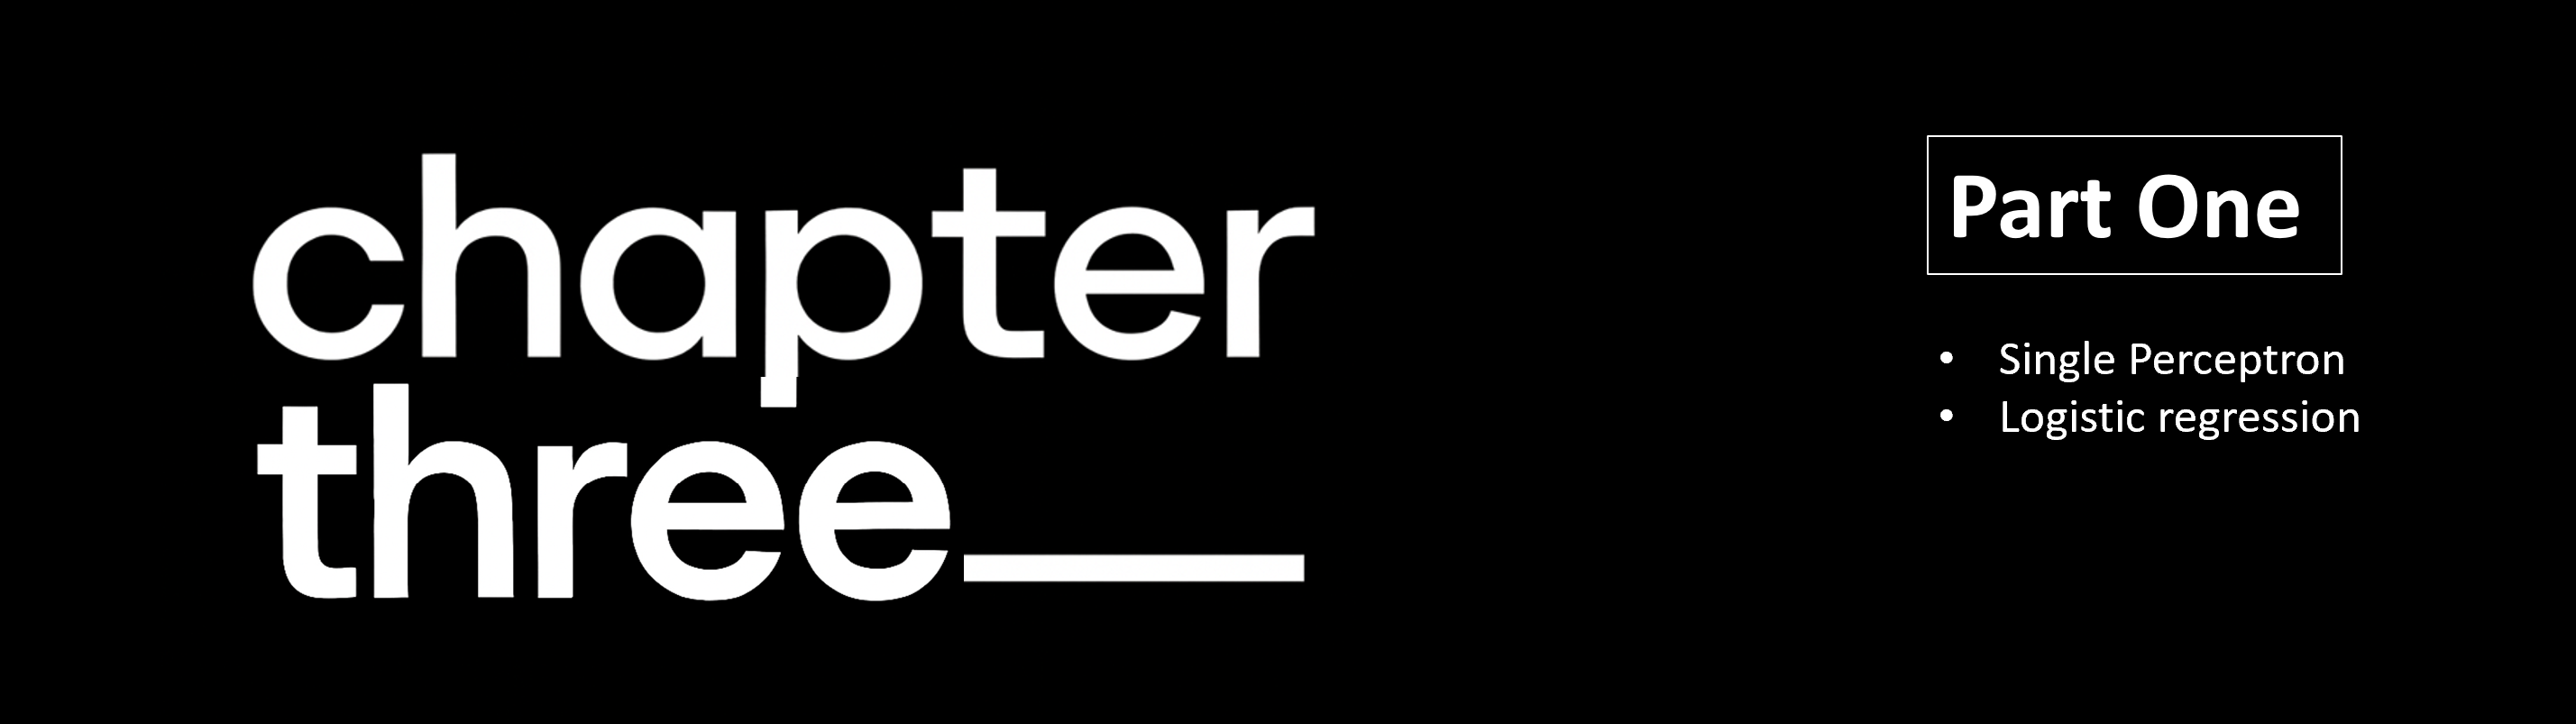



**This note book covers:**


1.   An introduction to robust and popular algorithms for classification, such as logistic regression and single perceptron
2.   Examples and explanations using scikit-learn machine learning libraries
3.   Discussion about the strenghts and weaknesses of classifiers with linear and nonlinear decision boundaries.


### **The five main steps  in training a supervised machine learning algorithm:**

1️⃣ Selecting features and collecting labeled training examples

2️⃣Choosing a performance metric

3️⃣Choosing a learning algorithm and training a model

4️⃣Evaluating the performance of the model

5️⃣Changing the settings of the algorithm and tuning the model.

### **upload and split the data**

In [74]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.datasets import load_iris

# Load data
iris=load_iris()
X=pd.DataFrame(iris.data[:,[2,3]])
display(X.head(5))
Y=pd.DataFrame(iris.target)
print("Class labels= ", Y[0].unique())
print("labels count:  ", Y.value_counts())

,0,1
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Class labels=  [0 1 2]
labels count:   0
0    50
1    50
2    50
Name: count, dtype: int64


#### **Stratify** in split function
**Without stratify**

The split is random → you might end up with:

Test set having mostly one class or some classes missing entirely

*   This causes biased training and poor evaluation.

**With stratify=y**

Balanced split → same percentage of each class in both sets
*   Better generalization + reliable accuracy score

In [75]:
# Import libraries
from sklearn.model_selection import train_test_split

# Split Data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state=32 , stratify=Y )

# Check the splited data
print("labels count in Y_train:  ", Y_train.value_counts())
print("labels count in Y_test:  ", Y_test.value_counts())

labels count in Y_train:   0
0    35
1    35
2    35
Name: count, dtype: int64
labels count in Y_test:   0
0    15
1    15
2    15
Name: count, dtype: int64


#### **StandardScaler()**
It is a preprocessing tool in scikit-learn used to standardize numerical features.

🔍 What does it do?

It transforms data so that each feature has:

Mean = 0

Standard deviation = 1

This process is called feature scaling or standardization.

##### **Standardization Formula**

$$
z = \frac{x - \mu}{\sigma}
$$

Where:
- $x$ = original value  
- $\mu$ = feature mean  
- $\sigma$ = standard deviation


Using the **fit** method, StandardScaler estimated the parameters, μ (sample mean) and σ (standard deviation), for each feature dimension from the training data. By calling the **transform** method, we then standardized the training data using those estimated parameters, μ and σ.

In [76]:
# Import libraries
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

## **Train Perceptron Model**


In [78]:
y_pred=Perceptron_Model.predict(X_test_std)
print("Number of Misclassified Examples:  ", (Y_test.squeeze() != y_pred).sum())
print("Percentage of Misclassified Examples:  ", (Y_test.squeeze() != y_pred).mean())

Number of Misclassified Examples:   3
Percentage of Misclassified Examples:   0.06666666666666667


### **Calculate Accuracy Metric**

In [79]:
# Import libraries
from sklearn.metrics import accuracy_score
print("Accuracy Score=  ", accuracy_score(Y_test,y_pred))

Accuracy Score=   0.9333333333333333


### **Decision regions plot (Function Define)**

In [80]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')

    # highlight test samples
    if test_idx is not None:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='Test set')


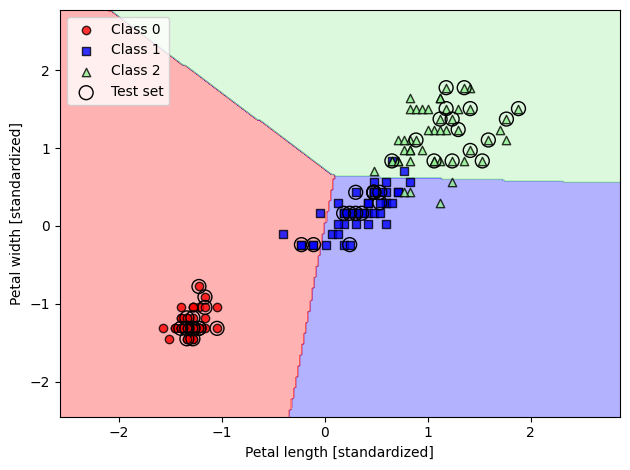

In [81]:
X_combined_std = np.vstack((X_train_std, X_test_std))
Y_train = np.array(Y_train).ravel()
Y_test = np.array(Y_test).ravel()
y_combined = np.hstack((Y_train, Y_test))
# Plot decision regions
plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=Perceptron_Model,
    test_idx=range(105, 150)
)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## **Train logistic regression Model**
**here we use just two classes of data in order to classify the data by a single line**

In [82]:
X_train_01= X_train_std[(Y_train== 0)|(Y_train== 1)]
Y_train_01= Y_train[(Y_train== 0)|(Y_train== 1)]
X_test_01= X_test_std[(Y_test== 0)|(Y_test== 1)]
Y_test_01= Y_test[(Y_test== 0)|(Y_test== 1)]

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_01, Y_train_01)

y_pred_01 = log_reg.predict(X_test_01)
print("Accuracy Score=  ", accuracy_score(Y_test_01,y_pred_01 ))


Accuracy Score=   1.0


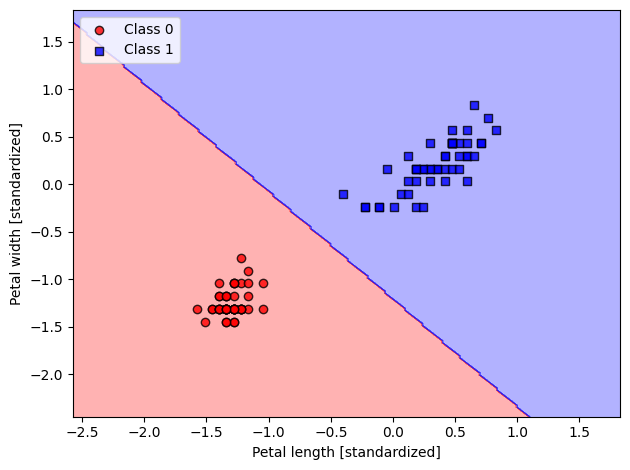

In [83]:
X_combined_std = np.vstack((X_train_01, X_test_01))
Y_train = np.array(Y_train_01).ravel()
Y_test = np.array(Y_test_01).ravel()
y_combined = np.hstack((Y_train_01, Y_test_01))
# Plot decision regions
plot_decision_regions(
    X=X_combined_std,
    y=y_combined,
    classifier=log_reg
)

plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()